## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combined_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
combined_df["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df[combined_df[["Mouse ID", "Timepoint"]].duplicated()]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
index_df = combined_df.set_index("Mouse ID")
index_df.loc["g989"]


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_df = index_df.drop(["g989"])
clean_combined_df.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_combined_df2 = clean_combined_df.reset_index()
clean_combined_df2["Mouse ID"].nunique()

248

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.

reg = clean_combined_df2.groupby(["Drug Regimen"])

tumour_mean = reg["Tumour Volume (mm3)"].mean()
tumour_median = reg["Tumour Volume (mm3)"].median()
tumour_var = reg["Tumour Volume (mm3)"].var()
tumour_std = reg["Tumour Volume (mm3)"].std()
tumour_sem = reg["Tumour Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Mean": tumour_mean,
                         "Median": tumour_median,
                         "Variance": tumour_var,
                         "Std Deviation": tumour_std,
                         "SEM": tumour_sem})
summary_df

,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of Timepoints per Drug Regimen'}, xlabel='Drug Regimen'>

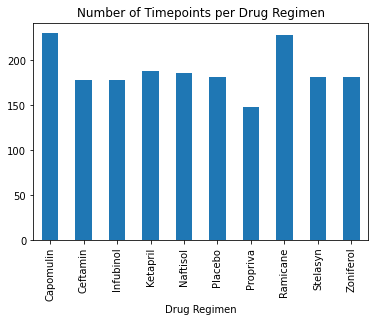

In [30]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint = clean_combined_df2.groupby(["Drug Regimen"])["Timepoint"].count()

timepoint.plot.bar(title="Number of Timepoints per Drug Regimen")





In [19]:
print(timepoint)

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64


Text(0.5, 1.0, 'Number of Timepoints per Drug Regimen')

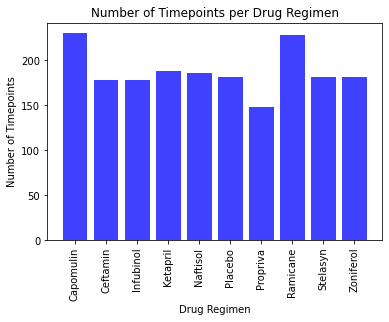

In [20]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
time_point = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]
x_axis = np.arange(len(time_point))

plt.bar(x_axis, time_point, color='blue', alpha=0.75, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo",
                           "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])
plt.xticks(rotation='vertical')

plt.ylabel("Number of Timepoints")
plt.xlabel("Drug Regimen")
plt.title("Number of Timepoints per Drug Regimen")

<AxesSubplot:title={'center':'Distribution of Female vs Male Mice'}, ylabel='Sex'>

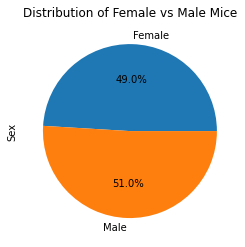

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = clean_combined_df2.groupby(["Sex"])["Sex"].count()

sex.plot.pie(autopct="%1.1f%%", title="Distribution of Female vs Male Mice")


In [22]:
print(sex)

Sex
Female    922
Male      958
Name: Sex, dtype: int64


Text(0.5, 1.0, 'Distribution of Female vs Male Mice')

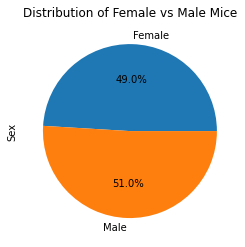

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex, labels=("Female", "Male"), autopct="%1.1f%%")
plt.ylabel("Sex")
plt.title("Distribution of Female vs Male Mice")

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
last_tp = clean_combined_df2.groupby(["Mouse ID"])["Timepoint"].max()
last_tp_df = pd.DataFrame(last_tp)


# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
last_df = pd.merge(clean_combined_df2, last_tp_df, on=("Mouse ID", "Timepoint"), how="right")
last_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumour vol data (for plotting)
tumour_cap = []
tumour_ram = []
tumour_inf = []
tumour_cef = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumour volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest


## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment on Mouse b128')

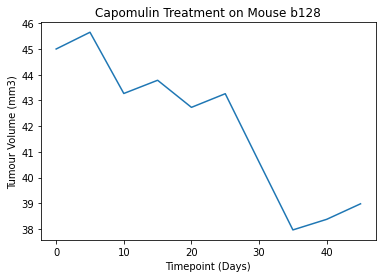

In [29]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
mouse_cap_df = clean_combined_df2.loc[clean_combined_df2["Mouse ID"] == "b128",:]
mouse_cap_df

time_point2 = mouse_cap_df["Timepoint"]
tumour_size = mouse_cap_df["Tumour Volume (mm3)"]

plt.plot(time_point2, tumour_size)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumour Volume (mm3)")
plt.title("Capomulin Treatment on Mouse b128")


Text(0.5, 1.0, 'Average Tumour Volume vs Mouse Weight')

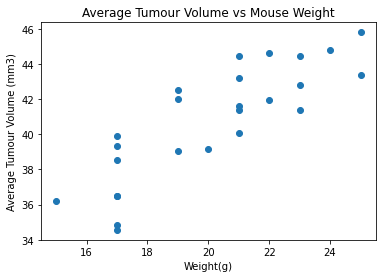

In [37]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
cap_df = clean_combined_df2.loc[clean_combined_df2["Drug Regimen"] == "Capomulin",:]
cap_df

tumour_avg = cap_df.groupby(["Mouse ID"]).mean()

plt.scatter(tumour_avg["Weight (g)"], tumour_avg["Tumour Volume (mm3)"])
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumour Volume (mm3)")
plt.title("Average Tumour Volume vs Mouse Weight")



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
